<a href="https://colab.research.google.com/github/Hidestament/AtCoder/blob/main/ABC/ABC180.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A - box

In [6]:
n, a, b = map(int, input().split())
print(n - a + b)

100 1 2
101


# B - Various distance

In [8]:
n = int(input())
x = list(map(int, input().split()))

2
2 -1


In [9]:
l1_dis = 0
l2_dis = 0
l3_dis = 0
for i in x:
  l1_dis += abs(i)
  l2_dis += (i * i)
  if l3_dis < abs(i):
    l3_dis = abs(i)

print(l1_dis)
print(l2_dis ** 0.5)
print(l3_dis)

3
2.23606797749979
2


# C - Cream puff

In [12]:
n = int(input())

6


In [15]:
ans = set()
for i in range(1, int(n**0.5) + 1):
  if n % i == 0:
    ans.add(i)
    ans.add(n // i)

ans = sorted(list(ans))

[1, 2, 3, 6]


In [ ]:
for i in ans:
  print(i)

# D - Takahasi Unevolved

## TLEになってしまった.
貪欲法的に選ぶ

In [26]:
x, y, a, b = map(int, input().split())

4 20 2 10


In [27]:
ans = 0
while min(a * x, x+b) < y:
  ans += 1
  if a * x < x + b:
    x = a*x
  elif a * x >= x + b:
    x += b
print(ans)

0
1
2


## 通う順番は決定できる
過去問ジム(*a) と Atcoderジム(+b) はどちらを最初に通うべきかというと, 過去問ジムである.

これは指数関数の増加が, 最初は緩やかだが途中から急になることからわかると思う.

よって, 過去問ジムに通える最高回数を計算し, それぞれの回数において, Atcoderジムに通える回数を計算する.

その中で一番経験値が多かったものが答えになる.

過去問ジムに通える最高回数の計算
$$
x * a^n < y \\

a^n < y/x \\

n < \log_a y/x
$$

過去問ジムにn回通ったときの, Atcoderジムに通える最高回数k
$$
x * a^n + b * k < y \\
b * k < y - x * a^n \\
k < (y-x*a^n) / b
$$

In [45]:
x, y, a, b = map(int, input().split())

1 1000000000000000000 10 1000000000


In [50]:
import math
ans = 0
max_kakomon = int(math.log(y/x, a)) 

for i in range(max_kakomon + 1):
  temp = 0
  temp += i
  # yは含んじゃだめなので, y-1 であることに注意
  res = (y-1) - (x * (a ** i))
  if res > 0:
    max_atcoder = res // b
    temp += max_atcoder
    if ans < temp:
      ans = temp

print(ans)

1000000007


## きれいな解答

In [53]:
x, y, a, b = map(int, input().split())

ans = 0
while a*x <= x + b and a * x < y:
  x *= a
  ans += 1
print(ans + ((y-1-x)//b))

1 1000000000000000000 10 1000000000
9
1000000007


## おまけ：n^k と k * n の増加の仕方

In [2]:
x, y, a, b = map(int, input().split())

4 20 2 10


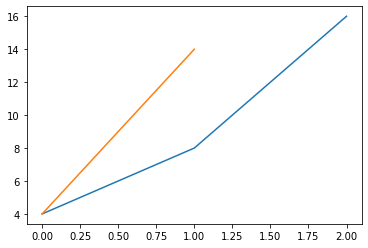

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

# nはジムに通う回数
n = np.arange(0, int(math.log(y/x, a)) + 1, 1)
ex = x * (a ** n)

k = np.arange(0, (y-x)//b + 1, 1)
ex_k = x + (b * k)

plt.plot(n,ex)
plt.plot(k, ex_k)
plt.show()